#### Prerequisites

In [ ]:
%%capture

!pip install bbox-visualizer
!pip install matplotlib

#### Imports 

In [1]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
import numpy as np
import cv2
import os

In [3]:
import bbox_visualizer as bbv
import cv2
import json
import cv2
import os

### Explore images with bounding boxes for facial mask detection

In [4]:
with open('./data/annotations.json') as f:
    annotations_dict = json.load(f)
images_list = annotations_dict['images']
annotations_list = annotations_dict['annotations']

In [5]:
def find_bboxes(id_):
    bboxes = []
    for annotation in annotations_list:
        if annotation['image_id'] == id_:
            bboxes.append(annotation['bbox'])
    return bboxes

In [6]:
def show_image_with_bboxes(file_name, bboxes):
    labels = ['MASK'] * len(bboxes)
    img = cv2.imread(f'./data/images/{file_name}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = bbv.draw_multiple_rectangles(img, bboxes)
    
    
    plt.imshow(img)
    plt.show()

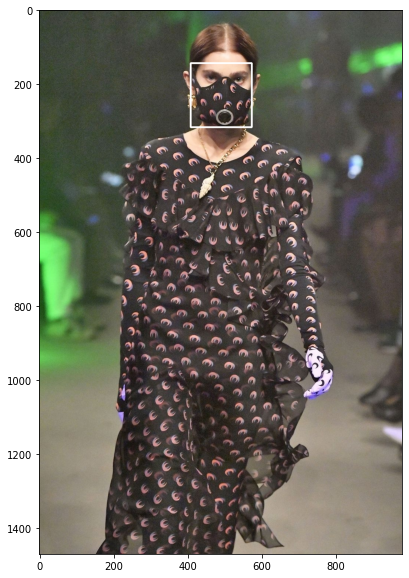

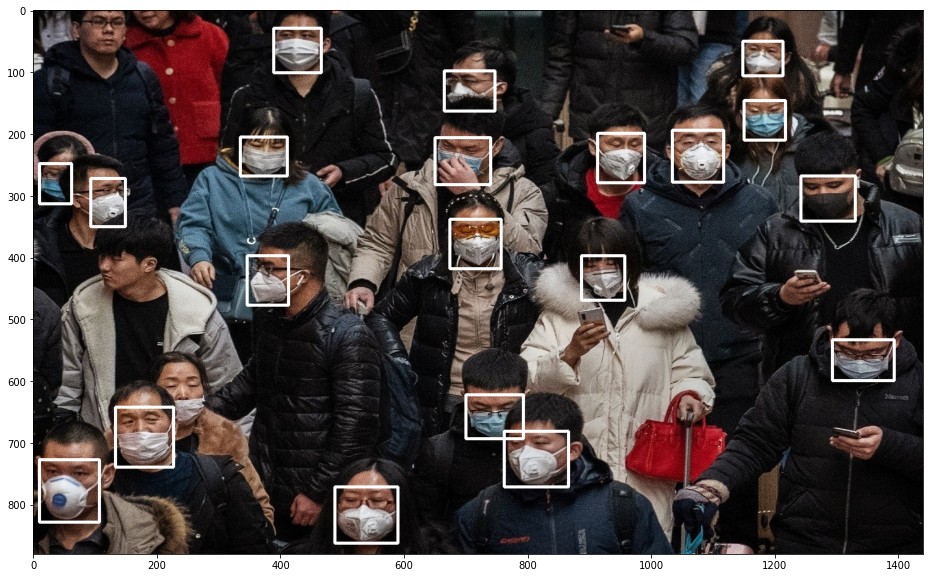

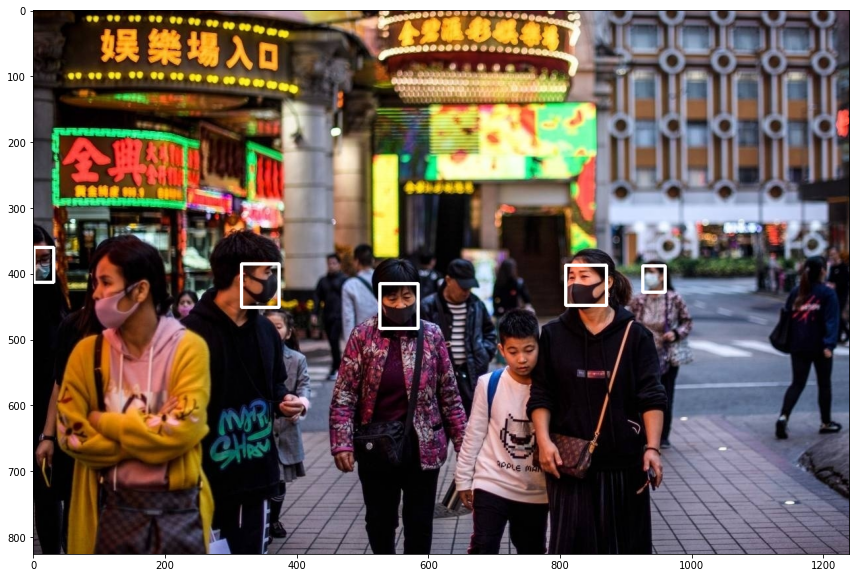

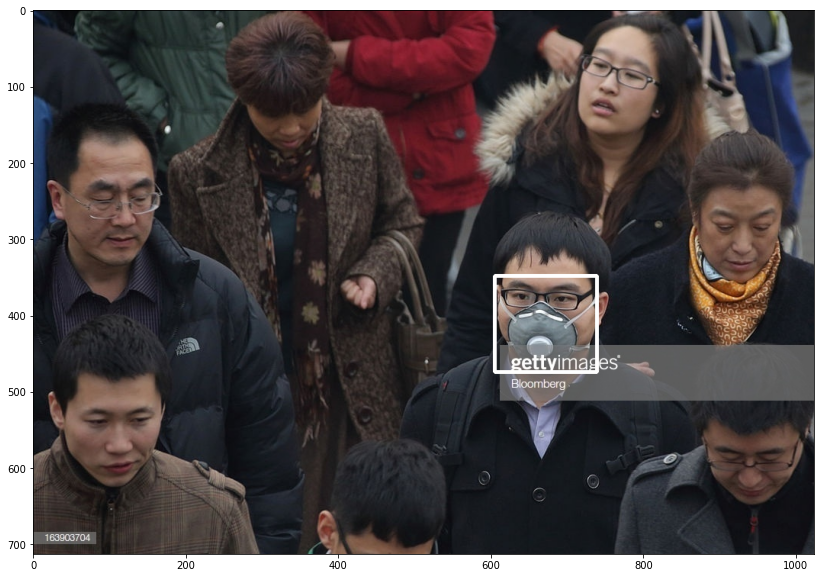

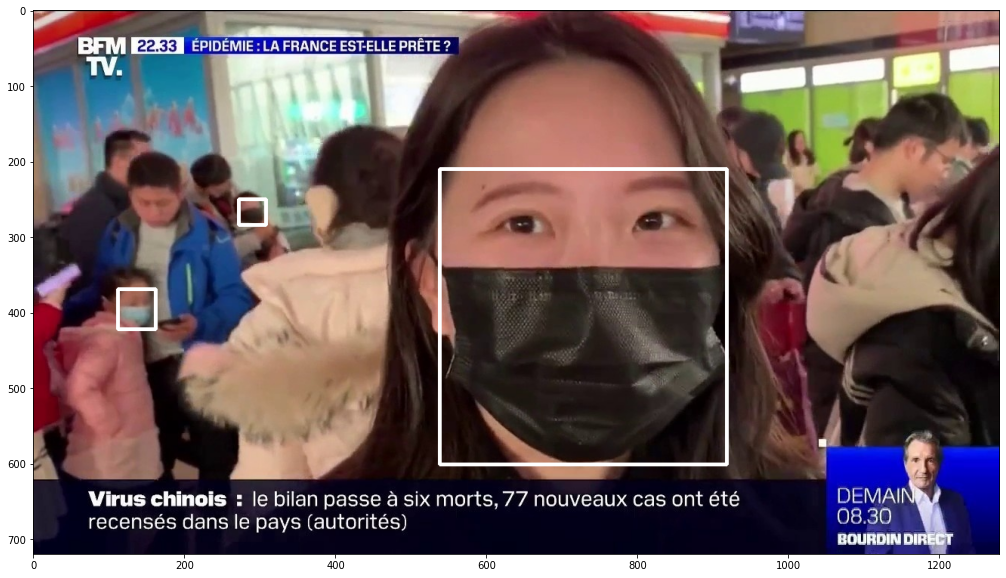

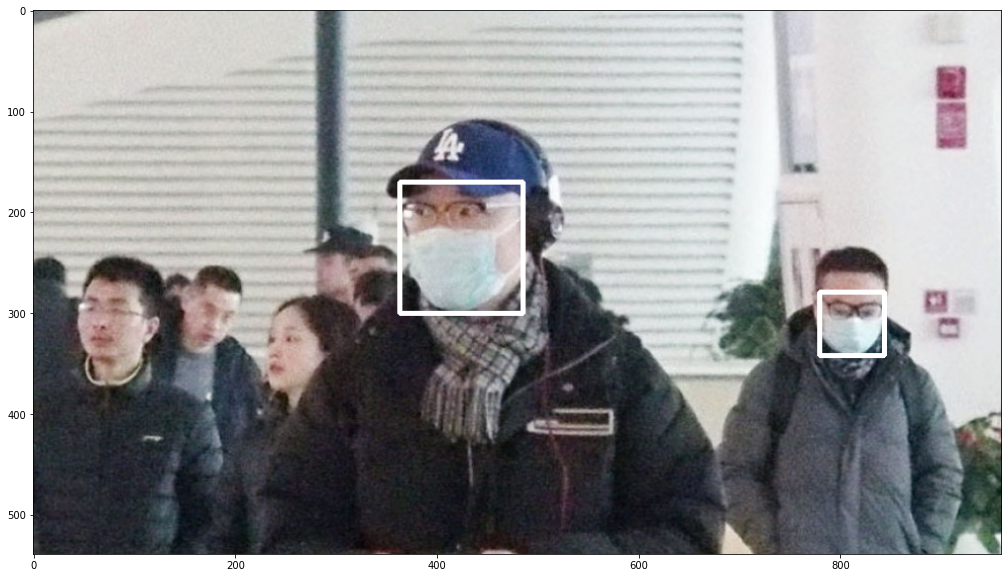

In [7]:
i = 0
for image, annotations in zip(images_list, annotations_list):
    file_name = image['file_name']
    bboxes = find_bboxes(file_name)
    show_image_with_bboxes(file_name, bboxes)
    if i == 5:
        break
    i += 1